<a href="https://colab.research.google.com/github/mehrnazeraeisi/Iris/blob/main/Iris_Regression_Modification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# Function to prioritize features based on KNN R² score
def features_prioritization(X, y, features):
    features_scores = []
    knn_reg = KNeighborsRegressor()

    for feature in features:
        X_feature = X[[feature]]  # Ensure 2D
        knn_reg.fit(X_feature, y)
        r2 = knn_reg.score(X_feature, y)
        features_scores.append((feature, r2))

    df_scores = pd.DataFrame(features_scores, columns=['Feature', 'R2_Score']).sort_values(by='R2_Score', ascending=False)
    return df_scores


In [3]:
# Function to compute KNN classification accuracy for feature group
def knn_accuracy(X, y, selected_features):
    if not selected_features:
        return np.nan
    model = KNeighborsClassifier()
    X_subset = X[selected_features]
    model.fit(X_subset, y)
    y_pred = model.predict(X_subset)
    return accuracy_score(y, y_pred)

In [4]:
# Load iris dataset
iris = load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)  # Convert to DataFrame
y_iris = iris.target
iris_features = iris.feature_names


In [5]:
# Run feature prioritization for the iris dataset
iris_scores = features_prioritization(X_iris, y_iris, iris_features)
print("🔎 Feature Group Performance Summary (Iris dataset):")
print(iris_scores)  # Categorize features by R² score

🔎 Feature Group Performance Summary (Iris dataset):
             Feature  R2_Score
2  petal length (cm)    0.9496
3   petal width (cm)    0.9464
0  sepal length (cm)    0.6916
1   sepal width (cm)   -0.1940


In [6]:
# Categorizing features by R² score into multiple levels
strong_features = iris_scores[iris_scores['R2_Score'] > 0.8]['Feature'].tolist()
medium_features_1 = iris_scores[(iris_scores['R2_Score'] > 0.7) & (iris_scores['R2_Score'] <= 0.8)]['Feature'].tolist()
medium_features_2 = iris_scores[(iris_scores['R2_Score'] > 0.6) & (iris_scores['R2_Score'] <= 0.7)]['Feature'].tolist()
medium_features_3 = iris_scores[(iris_scores['R2_Score'] > 0.5) & (iris_scores['R2_Score'] <= 0.6)]['Feature'].tolist()
medium_features_4 = iris_scores[(iris_scores['R2_Score'] > 0.4) & (iris_scores['R2_Score'] <= 0.5)]['Feature'].tolist()
medium_features_5 = iris_scores[(iris_scores['R2_Score'] > 0.3) & (iris_scores['R2_Score'] <= 0.4)]['Feature'].tolist()
medium_features_6 = iris_scores[(iris_scores['R2_Score'] > 0.2) & (iris_scores['R2_Score'] <= 0.3)]['Feature'].tolist()
poor_features = iris_scores[iris_scores['R2_Score'] <= 0.2]['Feature'].tolist()


In [8]:
# Function to safely compute KNN R² score for feature group
def knn_score(X, y, selected_features):
    if not selected_features:  # Handle empty groups
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X[selected_features]
    model.fit(X_subset, y)
    return model.score(X_subset, y)


In [9]:

# Compute R² and accuracy scores for each group
groups = [iris_features, strong_features, medium_features_1, medium_features_2, medium_features_3,
          medium_features_4, medium_features_5, medium_features_6, poor_features]

r2_scores = [knn_score(X_iris, y_iris, group) for group in groups]
acc_scores = [knn_accuracy(X_iris, y_iris, group) for group in groups]


In [10]:
# Function to safely compute KNN R² score for feature group
def knn_score(X, y, selected_features):
    if not selected_features:  # Handle empty groups
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X[selected_features]
    model.fit(X_subset, y)
    return model.score(X_subset, y)


In [11]:
# Compute R² scores for groups
r2_all = knn_score(X_iris, y_iris, iris_features)
r2_strong = knn_score(X_iris, y_iris, strong_features)
r2_medium_1 = knn_score(X_iris, y_iris, medium_features_1)
r2_medium_2 = knn_score(X_iris, y_iris, medium_features_2)
r2_medium_3 = knn_score(X_iris, y_iris, medium_features_3)
r2_medium_4 = knn_score(X_iris, y_iris, medium_features_4)
r2_medium_5 = knn_score(X_iris, y_iris, medium_features_5)
r2_medium_6 = knn_score(X_iris, y_iris, medium_features_6)
r2_poor = knn_score(X_iris, y_iris, poor_features)

In [12]:
# Heatmap visualization with R² in titles
def id_matrix(X, y, features, scores_dict):
    n_plots = len(features)
    n_rows = (n_plots + 1) // 2
    fig, axes = plt.subplots(n_rows, 2, figsize=(12, 4 * n_rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        values = X[feature].values.reshape(-1, 1)
        dist_mat = np.abs(values - values.T)
        sorted_indices = np.argsort(dist_mat, axis=1)
        nearest_labels = y[sorted_indices]

        sns.heatmap(nearest_labels, annot=False, cmap='YlGnBu', cbar=True, ax=axes[i])
        r2_val = scores_dict.get(feature, None)
        title = f'{feature}\nR² = {r2_val:.2f}' if r2_val is not None else feature
        axes[i].set_title(title)
        axes[i].set_xlabel('Samples')
        axes[i].set_ylabel('Samples')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [13]:
# Create dictionary for R² lookups
r2_dict = dict(zip(iris_scores['Feature'], iris_scores['R2_Score']))

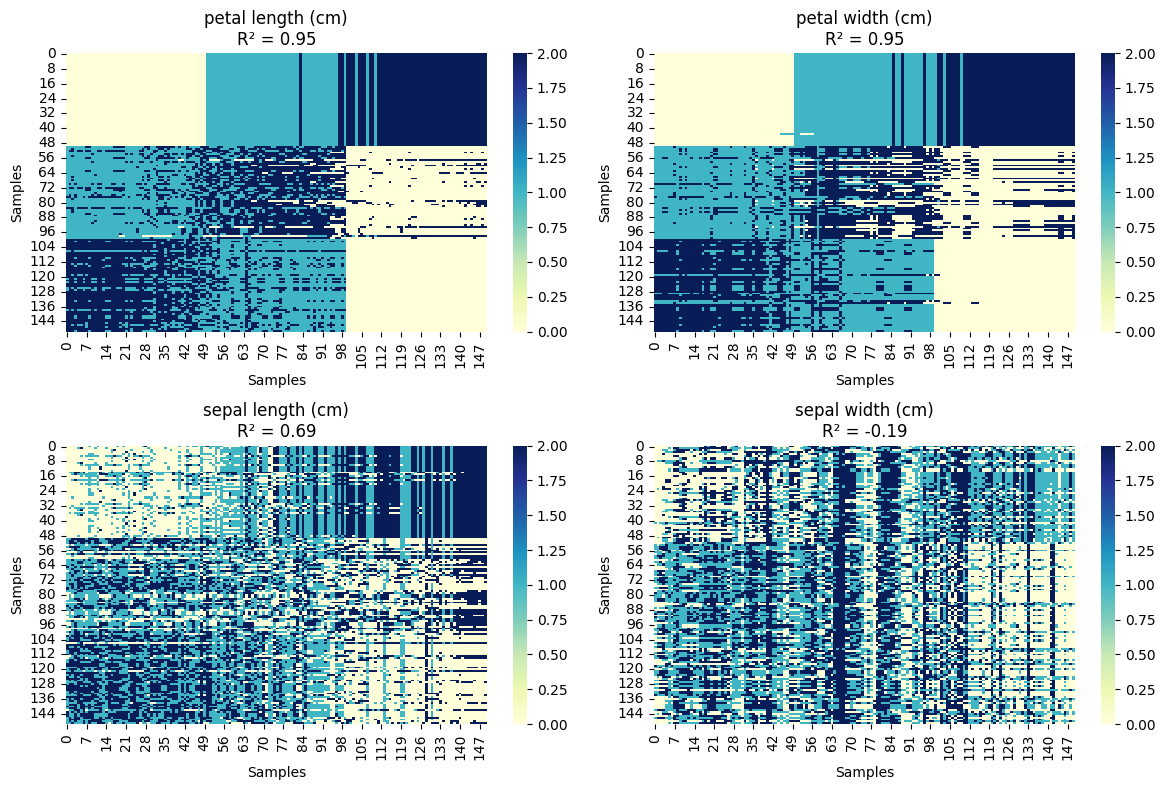

In [14]:
# Plot sorted heatmaps
id_matrix(X_iris, y_iris, iris_scores['Feature'].tolist(), r2_dict)

In [15]:
def plot_feature_vs_target_indexed_grid(X, y, df_scores):
    features_sorted = df_scores['Feature'].tolist()
    n_features = len(features_sorted)
    n_rows = (n_features + 1) // 2

    fig, axes = plt.subplots(n_rows, 2, figsize=(16, 4 * n_rows))
    axes = axes.flatten()

    n_samples = len(X)

    for i, feature in enumerate(features_sorted):
        values = X[feature].values
        indices = np.argsort(values)
        x_axis = np.arange(n_samples)  # Sequential indices
        y_axis = y[indices]

        ax = axes[i]
        ax.scatter(x_axis, y_axis, c=y_axis, cmap='Set1', edgecolor='k', s=50)
        ax.set_title(f"{feature} (R² = {df_scores.loc[df_scores['Feature'] == feature, 'R2_Score'].values[0]:.2f})")
        ax.set_xlabel("Sorted Sample Index")
        ax.set_ylabel("Target")

        # Add vertical gridlines for each point
        ax.set_xticks(np.arange(0, n_samples, 1))
        ax.grid(True, axis='x', linestyle='--', linewidth=0.4, alpha=0.7)

        # Optional: Reduce number of xtick labels to avoid clutter
        if n_samples > 40:
            ax.set_xticks(np.arange(0, n_samples, 10))
            ax.set_xticklabels(np.arange(0, n_samples, 10))

    # Remove unused subplots if number of features is odd
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

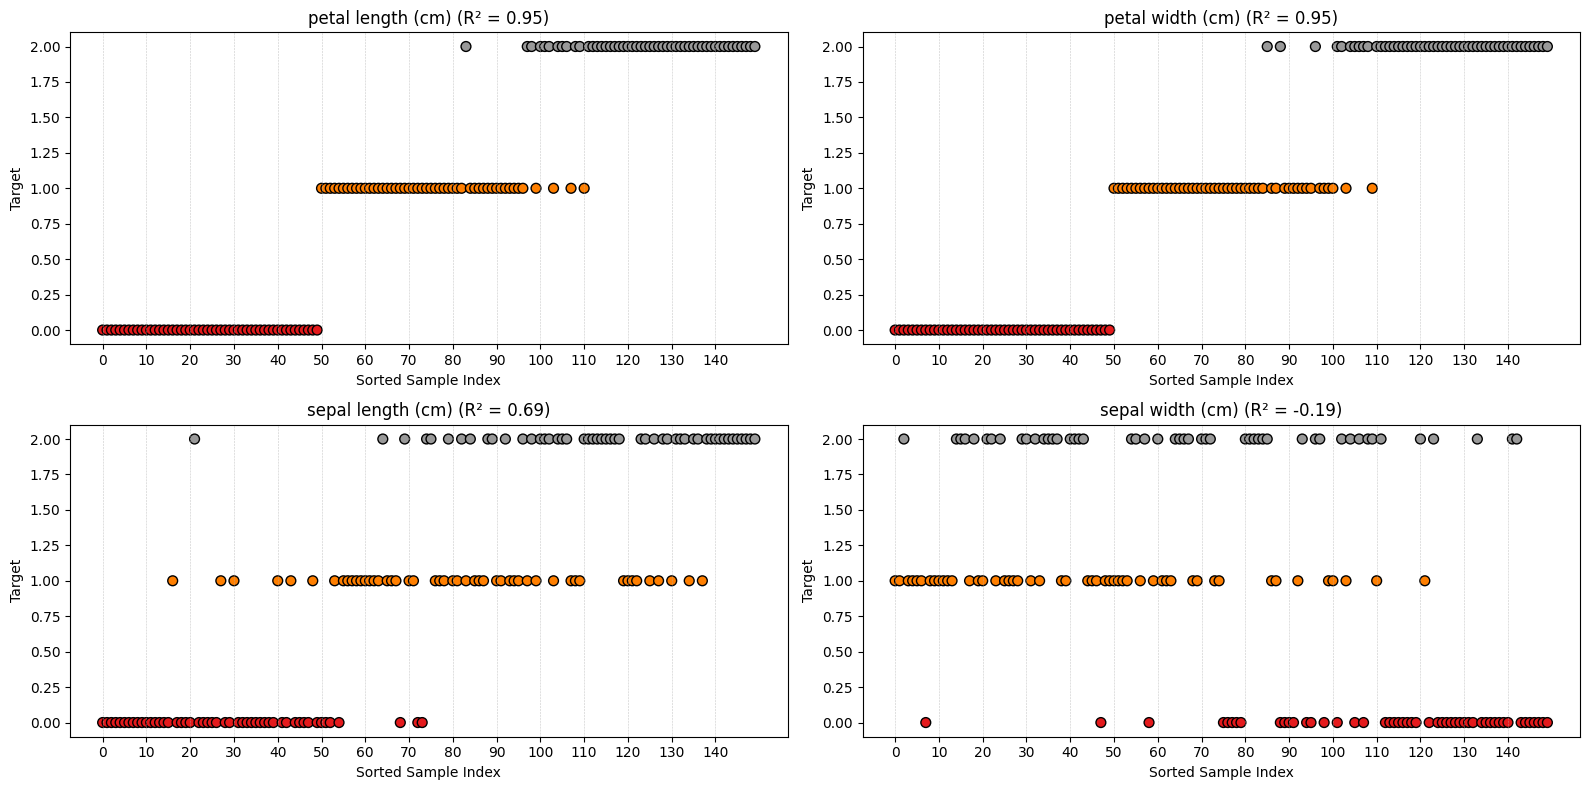

In [16]:
# Call the updated function
plot_feature_vs_target_indexed_grid(X_iris, y_iris, iris_scores)

In [17]:
# Compute R² and accuracy scores for each group
groups = [iris_features, strong_features, medium_features_1, medium_features_2, medium_features_3,
          medium_features_4, medium_features_5, medium_features_6, poor_features]

r2_scores = [knn_score(X_iris, y_iris, group) for group in groups]
acc_scores = [knn_accuracy(X_iris, y_iris, group) for group in groups]

In [18]:
# Build summary DataFrame
summary_df = pd.DataFrame({
    'Feature_Group': ['All Features', 'Strong Features', 'Medium Features (0.7-0.8)', 'Medium Features (0.6-0.7)',
                      'Medium Features (0.5-0.6)', 'Medium Features (0.4-0.5)', 'Medium Features (0.3-0.4)',
                      'Medium Features (0.2-0.3)', 'Poor Features'],
    'R2_Score': r2_scores,
    'Accuracy': acc_scores
})

print("\n📊 Grouped Feature Performance Summary (R² and Accuracy):")
print(summary_df)


📊 Grouped Feature Performance Summary (R² and Accuracy):
               Feature_Group  R2_Score  Accuracy
0               All Features    0.9700  0.966667
1            Strong Features    0.9672  0.960000
2  Medium Features (0.7-0.8)       NaN       NaN
3  Medium Features (0.6-0.7)    0.6916  0.720000
4  Medium Features (0.5-0.6)       NaN       NaN
5  Medium Features (0.4-0.5)       NaN       NaN
6  Medium Features (0.3-0.4)       NaN       NaN
7  Medium Features (0.2-0.3)       NaN       NaN
8              Poor Features   -0.1940  0.546667


In [19]:
# Initialize dictionaries
tv_iris = {}      # Total number of label blocks per feature
r2_iris  = {}
accu_iris  = {}
label_blocks = {}  # Store label-wise block counts

In [20]:
# Initialize models
k_opt = 5
knn_reg = KNeighborsRegressor(n_neighbors=k_opt)
knn_cls = KNeighborsClassifier(n_neighbors=k_opt)

In [21]:
for feature in iris_features:
    X_feature = X_iris[[feature]]

    # Fit KNN Regressor
    knn_reg.fit(X_feature, y_iris)
    r2 = knn_reg.score(X_feature, y_iris)
    r2_iris[feature] = r2

    # Fit KNN Classifier and calculate accuracy
    knn_cls.fit(X_feature, y_iris)
    predictions = knn_cls.predict(X_feature)
    accuracy = accuracy_score(y_iris, predictions)
    accu_iris[feature] = accuracy

    # Compute label "non-adjustments" (block count) after sorting
    sorted_index = np.argsort(X_feature.values.ravel())
    sorted_labels = y_iris[sorted_index]

    block_counts = {}
    for label in np.unique(y_iris):
        label_mask = (sorted_labels == label).astype(int)
        transitions = np.diff(np.pad(label_mask, (1, 0))) == 1
        block_count = np.sum(transitions)
        block_counts[label] = block_count

    tv_iris[feature] = sum(block_counts.values())  # Total blocks
    label_blocks[feature] = block_counts           # Save detailed label-wise

In [22]:
# Print results sorted by total non-adjustments
print(f"There are {len(y_iris)} datapoints. Operations based on k_opt={k_opt}")
print(f"{'Feature':30s} | {'TV (Blocks)':^12} | {'R²':^8} | {'Accuracy':^8} | Label Blocks")
print("-" * 90)

for f in sorted(tv_iris, key=tv_iris.get):
    blocks = label_blocks[f]
    block_str = " | ".join(f"L{l}:{blocks[l]}" for l in sorted(blocks))
    print(f"{f:30s} | {tv_iris[f]:^12d} | {r2_iris[f]:8.2f} | {accu_iris[f]:8.2f} | {block_str}")

There are 150 datapoints. Operations based on k_opt=5
Feature                        | TV (Blocks)  |    R²    | Accuracy | Label Blocks
------------------------------------------------------------------------------------------
petal length (cm)              |      13      |     0.95 |     0.95 | L0:1 | L1:6 | L2:6
petal width (cm)               |      13      |     0.95 |     0.96 | L0:1 | L1:6 | L2:6
sepal length (cm)              |      57      |     0.69 |     0.72 | L0:11 | L1:26 | L2:20
sepal width (cm)               |      64      |    -0.19 |     0.55 | L0:15 | L1:23 | L2:26


In [24]:
#### نتیجه گیری روی این دیتاست

#مقاسه ی روش کی ان ان رگرسیون به دو روش، یکی روی همه ی ویژگیها و یکی بعد از حذف ویژگی بد

# تقسیم داده به آموزش و آزمون (80% آموزش، 20% آزمون)
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris , test_size=0.2)

# حالت ۱: استفاده از تمام ۴ ویژگی
knn_full = KNeighborsRegressor()
knn_full.fit(X_train, y_train)
y_pred_full = knn_full.predict(X_test)

# محاسبه R² و Accuracy برای حالت ۱
r2_full = r2_score(y_test, y_pred_full)
acc_full = accuracy_score(y_test, np.round(y_pred_full))  # تبدیل پیش‌بینی‌های رگرسیون به کلاس

# حالت ۲: حذف sepal width
X_train_reduced = X_train.drop('sepal width (cm)', axis=1)
X_test_reduced = X_test.drop('sepal width (cm)', axis=1)

knn_reduced = KNeighborsRegressor()
knn_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = knn_reduced.predict(X_test_reduced)

# محاسبه R² و Accuracy برای حالت ۲
r2_reduced = r2_score(y_test, y_pred_reduced)
acc_reduced = accuracy_score(y_test, np.round(y_pred_reduced))

# نمایش نتایج
print("\nنتایج ارزیابی KNN Regression:")
print("--------------------------------")
print(f"۱. با تمام ۴ ویژگی:")
print(f"   - R² Score: {r2_full:.4f}")
print(f"   - Accuracy: {acc_full:.4f}")

print("\n۲. بدون ویژگی 'sepal width':")
print(f"   - R² Score: {r2_reduced:.4f}")
print(f"   - Accuracy: {acc_reduced:.4f}")

# مقایسه نتایج
if r2_full > r2_reduced:
    print("\nنتیجه: مدل با ۴ ویژگی عملکرد بهتری دارد.")
elif r2_full < r2_reduced:
    print("\nنتیجه: مدل با ۳ ویژگی عملکرد بهتری دارد.")
else:
    print("\nنتیجه: هر دو مدل عملکرد یکسانی دارند.")


نتایج ارزیابی KNN Regression:
--------------------------------
۱. با تمام ۴ ویژگی:
   - R² Score: 0.9536
   - Accuracy: 0.9667

۲. بدون ویژگی 'sepal width':
   - R² Score: 0.9620
   - Accuracy: 0.9667

نتیجه: مدل با ۳ ویژگی عملکرد بهتری دارد.


تعداد تکرارها را وارد کنید: 70
درصد داده آزمون را وارد کنید (مثلاً 0.2 برای 20%): 0.2

میانگین نتایج پس از تکرار:
--------------------------------
مدل با 4 ویژگی - میانگین R²: 0.9519, میانگین Accuracy: 0.9695
مدل با 3 ویژگی - میانگین R²: 0.9546, میانگین Accuracy: 0.9686


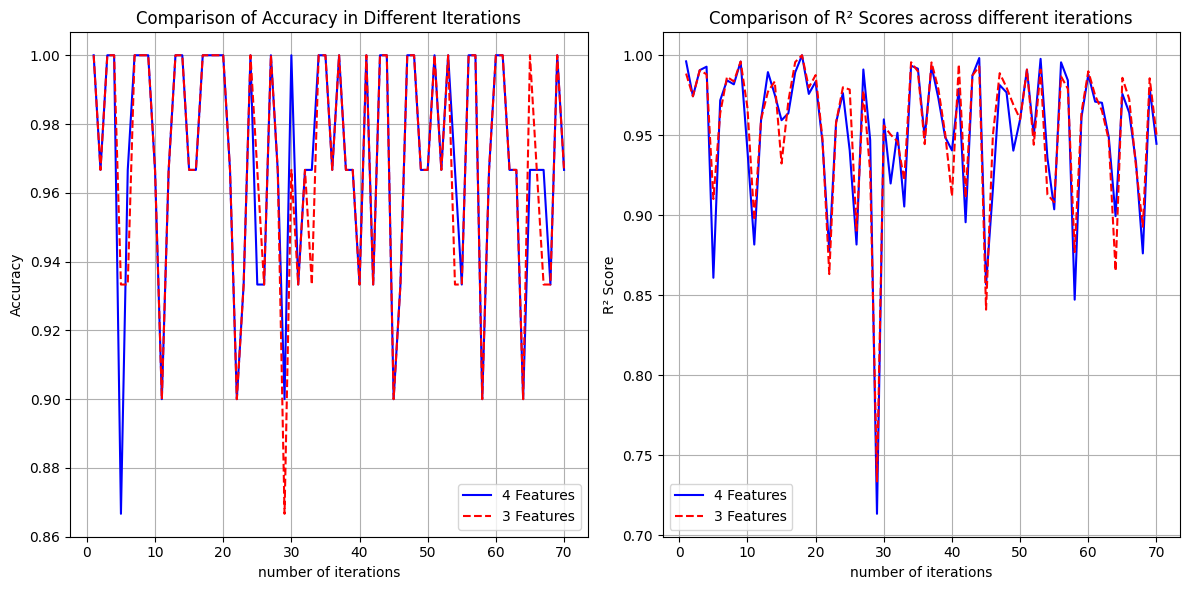


نتیجه‌گیری نهایی: مدل با 3 ویژگی عملکرد بهتری دارد.


In [26]:
# دریافت ورودی از کاربر
n_iterations = int(input("تعداد تکرارها را وارد کنید: "))
test_size = float(input("درصد داده آزمون را وارد کنید (مثلاً 0.2 برای 20%): "))

# آرایه‌های برای ذخیره نتایج
r2_full_list, r2_reduced_list = [], []
acc_full_list, acc_reduced_list = [], []
iterations = range(1, n_iterations+1)

# حلقه تکرار
for i in iterations:
    # تقسیم داده
    X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=test_size)

    # حالت 1: با تمام ویژگی‌ها
    knn_full = KNeighborsRegressor()
    knn_full.fit(X_train, y_train)
    y_pred_full = knn_full.predict(X_test)
    r2_full_list.append(r2_score(y_test, y_pred_full))
    acc_full_list.append(accuracy_score(y_test, np.round(y_pred_full)))

    # حالت 2: بدون sepal width
    X_train_reduced = X_train.drop('sepal width (cm)', axis=1)
    X_test_reduced = X_test.drop('sepal width (cm)', axis=1)
    knn_reduced = KNeighborsRegressor()
    knn_reduced.fit(X_train_reduced, y_train)
    y_pred_reduced = knn_reduced.predict(X_test_reduced)
    r2_reduced_list.append(r2_score(y_test, y_pred_reduced))
    acc_reduced_list.append(accuracy_score(y_test, np.round(y_pred_reduced)))

# محاسبه میانگین نتایج
avg_r2_full = np.mean(r2_full_list)
avg_r2_reduced = np.mean(r2_reduced_list)
avg_acc_full = np.mean(acc_full_list)
avg_acc_reduced = np.mean(acc_reduced_list)

# نمایش نتایج میانگین
print("\nمیانگین نتایج پس از تکرار:")
print("--------------------------------")
print(f"مدل با 4 ویژگی - میانگین R²: {avg_r2_full:.4f}, میانگین Accuracy: {avg_acc_full:.4f}")
print(f"مدل با 3 ویژگی - میانگین R²: {avg_r2_reduced:.4f}, میانگین Accuracy: {avg_acc_reduced:.4f}")

# رسم نمودارها
plt.figure(figsize=(12, 6))

# ساب‌پلات اول: Accuracy
plt.subplot(1, 2, 1)
plt.plot(iterations, acc_full_list, 'b-', label='4 Features')
plt.plot(iterations, acc_reduced_list, 'r--', label='3 Features')
plt.xlabel('number of iterations')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy in Different Iterations')
plt.legend()
plt.grid(True)

# ساب‌پلات دوم: R² Score
plt.subplot(1, 2, 2)
plt.plot(iterations, r2_full_list, 'b-', label='4 Features')
plt.plot(iterations, r2_reduced_list, 'r--', label='3 Features')
plt.xlabel('number of iterations')
plt.ylabel('R² Score')
plt.title('Comparison of R² Scores across different iterations')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# نتیجه‌گیری نهایی
if avg_r2_full > avg_r2_reduced:
    print("\nنتیجه‌گیری نهایی: مدل با 4 ویژگی عملکرد بهتری دارد.")
elif avg_r2_full < avg_r2_reduced:
    print("\nنتیجه‌گیری نهایی: مدل با 3 ویژگی عملکرد بهتری دارد.")
else:
    print("\nنتیجه‌گیری نهایی: هر دو مدل عملکرد یکسانی دارند.")